In [1]:
import numpy as np
import pandas as pd
from sklearn.cross_decomposition import PLSRegression
from sklearn.mixture import GaussianMixture
from sklearn.pipeline import Pipeline
from msresist.parameter_tuning import MSclusPLSR_tuning
from msresist.plsr import Q2Y_across_components, R2Y_across_components
from msresist.figures.figure3 import cv_pre, cm_pre, plotR2YQ2Y, plotMeasuredVsPredicted, plotScoresLoadings, plotclusteraverages, plotGridSearch
from msresist.clustering import MassSpecClustering
import matplotlib.pyplot as plt
from msresist.pre_processing import preprocessing
from msresist.FileExporter import create_download_link
import warnings
warnings.simplefilter("ignore")

In [2]:
# pd.set_option('display.max_colwidth', 1000)
# pd.set_option('display.max_rows', 1000000)
# pd.set_option('display.max_columns', 1000)

## Re-implementation with AXL mutants

### Phosphorylation measurements:

#### + Erlotinib + AXL-activating Antibody (AF154)

In [3]:
X = preprocessing(Axlmuts_ErlAF154=True, Vfilter=True, FCfilter=True, log2T=True, mc_row=True)

d = X.select_dtypes(include=['float64']).T
i = X.select_dtypes(include=['object'])

all_lines = ["PC9", "KO", "KD", "KI", "Y634F", "Y643F", "Y698F", "Y726F", "Y750F ", "Y821F"] 
mut_lines = all_lines[1:]
g_lines = all_lines[2:]

d.index = all_lines

0/771 peptides were not found in the proteome.
771


In [4]:
X

,Protein,Sequence,UniprotAcc,Position,BioReps,r2_Std,Gene,PC9 A,KO A,Kd A,KI A,M4 A,M5 A,M7 A,M10 A,M11 A,M15 A
0,26S proteasome regulatory subunit 4,DKKKKyEPPVP,P62191,Y25-p,1,N/A,PSMC1,-0.108045,-0.476332,-0.321637,-0.239781,0.126419,0.274226,0.243800,0.210842,0.326859,-0.036352
1,40S ribosomal protein S10,NRIAIyELLFK,P46783,Y12-p,1,N/A,RPS10,-0.169514,0.097204,-1.712342,0.173058,0.152218,-0.295116,0.846713,1.092283,-0.347285,0.162782
2,40S ribosomal protein SA,LTEASyVNLPT,P08865,Y139-p,1,N/A,RPSA,-0.905683,-0.264555,0.166887,0.990224,-0.256346,0.239761,-0.126352,0.681401,-0.332600,-0.192736
3,ARF GTPase-activating protein GIT1,DDQHDyDSVAS,Q9Y2X7,Y383-p,1,N/A,GIT1,0.670858,0.718143,0.225202,-0.528652,-0.461699,-0.161058,0.103659,-0.139631,-0.028111,-0.398711
4,ATPase WRNIP1,AGEEHyNCISA,Q96S55,Y500-p,1,N/A,WRNIP1,0.242877,0.226631,-0.140038,-0.402742,-0.033013,0.011860,0.085925,0.126432,-0.122947,0.005017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,Vigilin,INRMDyVEINI,Q00341,Y437-p,1,N/A,HDLBP,-0.263325,-0.061066,0.226309,0.144577,-0.166762,-0.106788,0.162886,-0.096486,0.160574,0.000081
290,Vinculin,FLDSGyRILGA,P18206,Y822-p,3,0.25,VCL,-0.058125,-0.354182,-0.021402,-0.067675,0.268052,-0.249421,0.026603,0.151849,0.202528,0.101774
291,Vinculin,GNQAAyEHFET,P18206,Y692-p,3,0.3,VCL,-0.011366,-0.298127,-0.159582,-0.227588,0.064568,-0.240977,0.138258,0.164782,0.333162,0.236871
292,Zinc finger Ran-binding domain-containing prot...,IEREEsDGEYD,O95218,S120-p,1,N/A,ZRANB2,-0.207557,-1.353244,0.642844,1.194481,-0.846227,0.561126,0.186066,0.657013,0.829678,-1.664181


### Phenotypes of AXL mutants

#### Cell Viability

In [5]:
all_lines = ["PC9-A/E", "AXL KO-A/E", "Kdead-A/E", "Kin-A/E", "M4-A/E", "M5-A/E", "M7-A/E", "M10-A/E", "M11-A/E", "M15-A/E"]
lines = all_lines[1:]
glines = lines[2:]

In [6]:
cv1 = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/CellViability/Phase/BR1_Phase.csv")
cv2 = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/CellViability/Phase/BR2_Phase.csv")
cv3 = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/CellViability/Phase/BR3_Phase.csv")

itp = 12
ftp = 120
tr = 'A/E'

v = cv_pre(cv1, cv2, cv3, tr, itp, ftp, all_lines)

In [7]:
v

lines
PC9-A/E       7.246282
AXL KO-A/E    2.375132
Kdead-A/E     3.653204
Kin-A/E       5.444662
M4-A/E        4.629951
M5-A/E        4.688294
M7-A/E        6.010366
M10-A/E       5.538995
M11-A/E       5.962925
M15-A/E       4.055604
Name: viability, dtype: float64

#### Cell Death

#### Cell Migration

In [8]:
all_lines = ["PC9 A/E", "KO A/E", "KD A/E", "KIN A/E", "M4 A/E", "M5 A/E", "M7 A/E", "M10 A/E", "M11 A/E", "M15 A/E"]
lines = all_lines[1:]
glines = all_lines[2:]

In [9]:
rwd = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/EMT/03062020-AXLmuts_EMT_RWD_Collagen_BR1.csv")
rwdg = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/EMT/03062020-AXLmuts_EMT_GreenRWD_Collagen_BR1.csv")
wc = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/EMT/03062020-AXLmuts_EMT_WC_Collagen_BR1.csv")

ftp = 24

m = cm_pre(rwd, tr, ftp, all_lines)
m.index = v.index

In [10]:
m

lines
PC9-A/E       94.584855
AXL KO-A/E    54.870760
Kdead-A/E     66.549360
Kin-A/E       96.111215
M4-A/E        91.605670
M5-A/E        85.836235
M7-A/E        87.085310
M10-A/E       82.729170
M11-A/E       79.769890
M15-A/E       66.557255
Name: 12, dtype: float64

#### Build Y Matrix

In [11]:
y = pd.concat([v, m], axis=1)
y.columns = ["Viability", "Migration"]

y

,Viability,Migration
lines,,
PC9-A/E,7.246282,94.584855
AXL KO-A/E,2.375132,54.870760
Kdead-A/E,3.653204,66.549360
Kin-A/E,5.444662,96.111215
M4-A/E,4.629951,91.605670
M5-A/E,4.688294,85.836235
M7-A/E,6.010366,87.085310
M10-A/E,5.538995,82.729170
M11-A/E,5.962925,79.769890


# Co-clustering and PLSR model

## Cross-validation Strategy 1: Leaving one condition out across fixed clusters

### Fitting PLSR each time

In [12]:
from pomegranate import *

In [13]:
distance_method = "Binomial"
ncl = 5
GMMweight = 100000

MSC = MassSpecClustering(i, ncl, GMMweight=GMMweight, distance_method=distance_method, n_runs=1).fit(d, y)
centers = MSC.transform(d)

run:  0
iter:  0
-114591.51469044673
iter:  1
-249400.83766501353
iter:  2
-275443.8646669012
iter:  3
-292186.24052779906
iter:  4
-312671.103805941
iter:  5
-324733.9819855579
iter:  6
-335580.5340113236


In [14]:
centers

,0,1,2,3,4
0,0.236582,0.115392,0.281210,0.207182,0.348138
1,-0.002434,-0.134619,-0.120658,0.010312,-0.162701
2,-0.192828,-0.178722,-0.295264,-0.216547,-0.069548
3,-0.069142,0.231219,-0.058775,-0.066082,-0.163347
4,-0.001710,-0.197636,0.029064,0.004021,-0.046739
5,-0.001740,0.086319,-0.001363,-0.095637,-0.138616
6,0.094745,0.058156,0.121176,0.117894,0.181123
7,-0.011563,0.069443,0.041888,0.037601,0.062610
8,-0.050181,0.146848,-0.000597,-0.030916,-0.043242
9,-0.001729,-0.196400,0.003318,0.032172,0.032323


#### R2Y/Q2Y

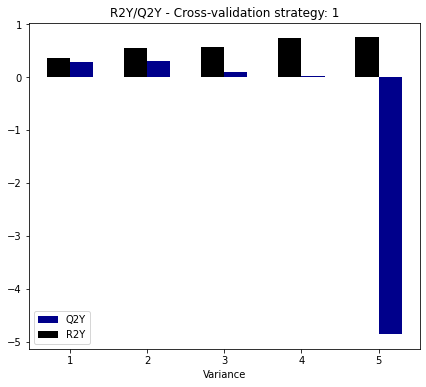

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(7,6))
plsr = PLSRegression(n_components=2)
plotR2YQ2Y(ax, plsr, centers, y, 1, ncl+1)

#### Measured vs Predicted

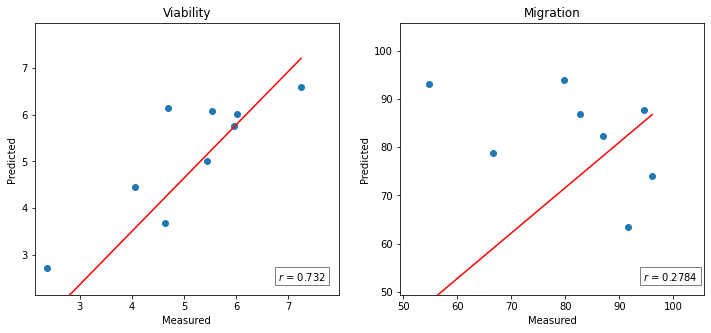

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
plotMeasuredVsPredicted(ax, plsr, centers, y)

#### Scores & Loadings

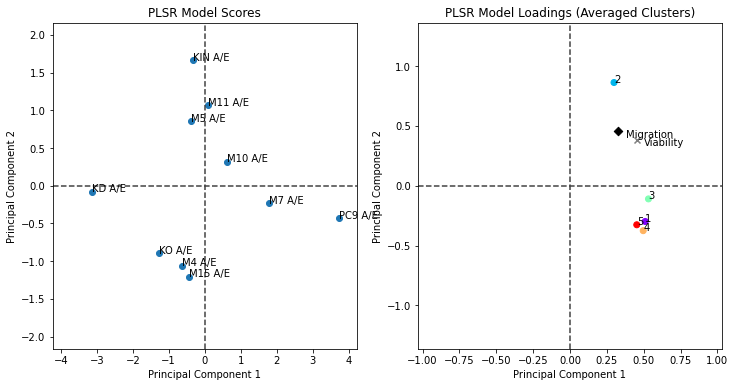

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
plotScoresLoadings(ax, plsr.fit(centers, y), centers, y, ncl, all_lines, 1)

In [18]:
# MSC.clustermembers(X.T).head()

#### Cluster Averages

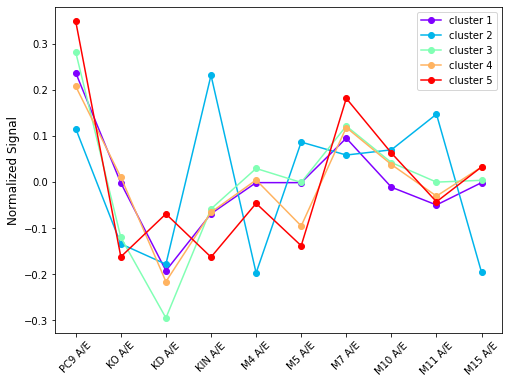

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

plotclusteraverages(ax, MSC.transform(d).T, all_lines)

## Cross-validation Strategy 2: Across entire pipeline

### Fitting entire model pipeline each time

In [20]:
ncomp = 2

CoCl_plsr = Pipeline([('CoCl', MassSpecClustering(i, ncl, GMMweight=GMMweight, distance_method=distance_method)), ('plsr', PLSRegression(ncomp))])
fit = CoCl_plsr.fit(d, y)
centers = CoCl_plsr.named_steps.CoCl.transform(d)

run:  0
iter:  0
-116964.70503154535
iter:  1
-221090.00655370436
iter:  2
-249099.62641161025
iter:  3
-268632.86734182405
iter:  4
-280498.9601184011
iter:  5
-288039.3453512016
iter:  6
-294901.2929692973
iter:  7
-297904.6543329809
iter:  8
-307988.07888218894
iter:  9
-313880.7613147206
iter:  10
-315980.76849088294
iter:  11
-318036.6132231763
iter:  12
-319128.3179790854
iter:  13
-319854.1221201015
iter:  14
-319775.4974009373
run:  1
iter:  0
-127684.57542166158
iter:  1
-284547.98474790406
iter:  2
-311495.4716741453
iter:  3
-327902.63183678454
iter:  4
-333809.8492422208
iter:  5
-340929.83092018147
iter:  6
-343494.3534092292
iter:  7
-344270.3473634831
run:  2
iter:  0
-146018.30931411372
iter:  1
-289424.41643421137
iter:  2
-311494.4176654844
iter:  3
-326554.700223324
iter:  4
-328680.6105453185
iter:  5
-330710.3982792979
iter:  6
-330939.95048841066
run:  3
iter:  0
Re-initialize GMM clusters, empty cluster(s) at iteration 0
iter:  1
-138978.3091266672
iter:  2
-2959

#### R2Y/Q2Y

In [21]:
# fig, ax = plt.subplots(1, 1, figsize=(7,6))
# plotR2YQ2Y(ax, CoCl_plsr, d, y, cv=2, b=ncl+1)

#### GridSearch

Run:

In [22]:
# scores = MSclusPLSR_tuning(d, i, y, "Binomial")

# scores = pd.DataFrame(scores)
# hp = scores.sort_values(by="mean_test_scores", ascending=False)
# hp.insert(0, "Ranking", list(np.arange(1, hp.shape[0]+1)))
# hp2 = scores[scores["#Components"]==2].sort_values(by="mean_test_scores", ascending=False)
# hp2.insert(0, "Ranking", list(np.arange(1, hp2.shape[0]+1)))

Import:

In [23]:
gs = pd.read_csv("msresist/data/Model/20200320-GridSearch_pam250_CVWC_wPC9.csv")

In [24]:
gs[gs["#Components"] == 2].head(10)

,Unnamed: 0,Ranking,#Clusters,#Components,GMMweights,mean_test_scores,mean_train_scores
9,253,10,11,2,5.0,-29.668806,-6.994764
26,377,27,15,2,1.0,-37.047167,-5.660698
30,385,31,15,2,10.0,-37.527371,-3.946341
32,61,33,4,2,5.0,-38.230793,-22.190356
37,165,38,8,2,20.0,-42.491368,-12.261999
40,321,41,13,2,10.0,-43.013695,-6.242054
41,325,42,13,2,20.0,-43.323571,-6.792835
42,189,43,9,2,5.0,-43.595687,-7.462485
44,381,45,15,2,5.0,-43.859577,-5.957370
45,133,46,7,2,20.0,-43.975031,-11.684045


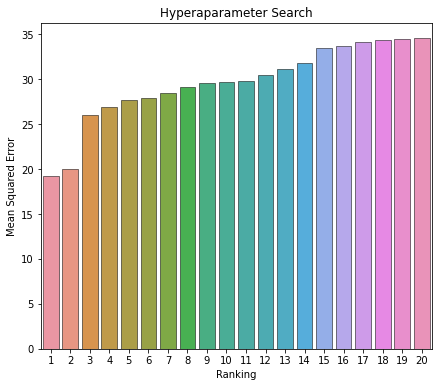

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(7,6))
plotGridSearch(ax, gs)

#### Measured vs Predicted

run:  0
iter:  0
-110616.1514556834
iter:  1
-278849.75003877905
iter:  2
-292202.2812114603
iter:  3
-302312.51303352654
iter:  4
-308482.8579175765
iter:  5
-313062.42033312935
iter:  6
-322003.87504935387
iter:  7
-329914.9107554899
iter:  8
-333966.3855033693
iter:  9
-333587.3955365279
iter:  10
-333990.95475848304
iter:  11
-334448.7151807163
iter:  12
-335144.54029891413
iter:  13
-335531.70199622086
iter:  14
-335110.76235351816
iter:  15
-335411.3200999633
run:  1
iter:  0
-112018.86220800327
iter:  1
-268769.25512169336
iter:  2
-276837.5861086529
iter:  3
-280968.6563451515
iter:  4
-282166.07581803115
iter:  5
-281523.6148785602
iter:  6
-281400.5287916767
run:  2
iter:  0
-94259.60661596406
iter:  1
-231461.6892806189
iter:  2
-279571.13504818664
iter:  3
-297885.5357822591
iter:  4
-302111.17032851954
iter:  5
-300425.3015438723
iter:  6
-300417.1640512093
run:  3
iter:  0
-158767.9442331598
iter:  1
-307474.8158450109
iter:  2
-339828.4089482309
iter:  3
-355797.41243647

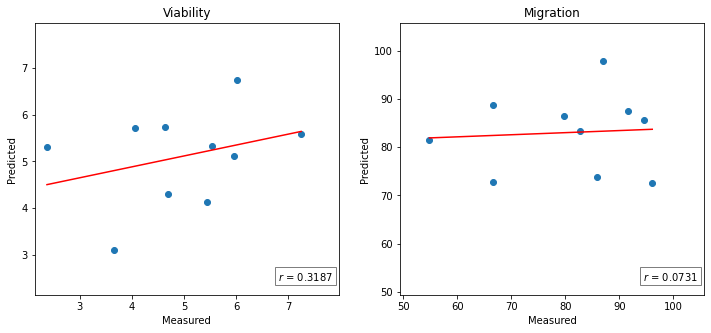

In [26]:
fig, ax = plt.subplots(1,2,figsize=(12,5))
plotMeasuredVsPredicted(ax, CoCl_plsr, d, y)

#### Scores & Loadings

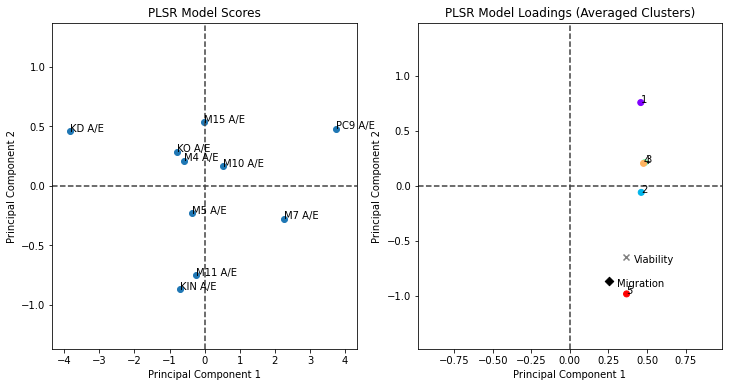

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))

plotScoresLoadings(ax, fit, centers, y, ncl, all_lines, 2)

In [28]:
clustermembers = CoCl_plsr.named_steps.CoCl.clustermembers(X.T)
create_download_link(clustermembers, "20200115-AXLaf154_BMP_W1/2.csv")

#### Cluster Averages

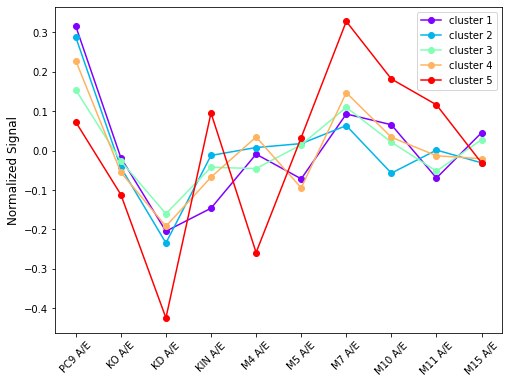

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

plotclusteraverages(ax, centers.T, all_lines)